## Testing Framework Output

* ParamSimMutation: Parameter(Simulation) - rate of mutation (evaluated at each speciation per gene)
* ParamSimHGT: Parameter(Simulation) - rate of horizontal gene transfer (as percentage of speciated genome)
* ParamSimDrop: Parameter(Simulation) - rate of gene drop (evaluated at each speciation per gene)
* ParamTestDistance: Parameter(Testing) - Maximum ancestor distance from "root" species (average of all gene distances)
* ParamTestTaxa: Parameter(Testing) - Minimum percent required of protein coverage for a species to be included next step
* ParamTestProtein: Parameter(Testing) - Minimum percent required of ancestor coverage for a protein to be included in profile
* ActualHost: Actual number of proteins present in host genome
* ActualOriginHost: Actual number of proteins from host lineage present in host genome
* ActualOriginSym: Actual number of proteins from symbiont lineage present in host genome
* ActualHGT: Actual number of HGT events between symbiont and host
* ResultHost: Calculated count of proteins in host profile
* ResultSym: Calculated count of proteins in symbiont profile
* ResultAmbig: Calculated count of proteins shared present in both host and symbiont profiles
* ResultGoodHost: Calculated number of correct host profile identifications
* ResultGoodSym: Calculated number of correct symbiont profile identifications
* ResultAmbigHost: Calculated number of amibiguous host profile identifications (protein was also in symbiont profile)
* ResultAmbigSym: Calculated number of ambiguous symiont profile identifications (protein was also in host profile)
* ResultBadHost: Calculated number of incorrect host profile identifications
* ResultBadSym: Calculated number of incorrect symbiont profile identifications 
* ResultHGTGood: Calculated number of correct HGT predictions
* ResultHGTAmbig: Calculated number of corrent HGT predictions belonging to ambiguous profiles
* ResultHGTBad: Calculated number of incorrect HGT predictions

**The following is an example random sampling from the dataframe:**

In [89]:
options(warn=-1)  
resultsSet <- read.csv("twestbrook-hgt1-results.txt", sep = "\t")
exampleSet <- resultsSet[sample(nrow(resultsSet), 5),]
cat(sprintf("Example set: %d out of %d rows\n", 5, nrow(resultsSet)))
tail(exampleSet)

Example set: 5 out of 360000 rows


,ParamSimMutation,ParamSimHGT,ParamSimDrop,ParamTestDistance,ParamTestTaxa,ParamTestProtein,ActualHost,ActualOriginHost,ActualOriginSym,ActualHGT,⋯,ResultAmbig,ResultGoodHost,ResultGoodSym,ResultAmbigHost,ResultAmbigSym,ResultBadHost,ResultBadSym,ResultHGTGood,ResultHGTAmbig,ResultHGTBad
336359,0.9,0.2,0.0,0.3,0.5,0.8,771,500,135,0,⋯,0,0,0,0,0,500,135,0,0,0
26068,0.0,0.4,0.2,0.0,0.6,0.7,982,330,314,118,⋯,0,0,0,0,0,330,314,0,0,118
237114,0.6,0.3,0.3,0.1,0.1,0.3,590,238,178,90,⋯,0,0,0,0,0,238,178,0,0,90
281653,0.7,0.4,0.5,0.6,0.5,0.2,612,132,230,172,⋯,0,0,0,0,0,132,230,0,0,172
157657,0.4,0.2,0.1,0.6,0.5,0.6,662,413,138,23,⋯,2,301,13,1,1,112,125,1,0,22


## Analysis

Effectiveness of phylogenetic profiling based on good profile hits minus bad hits out of total possible profile hits. Left doesn't remove ambiguous hits, while right does.

Given this, calculate the effectiveness for both host and symbiont, then plot to see correlation:

In [90]:
resultsSet$ResultEffectiveHost <- (resultsSet$ResultGoodHost - resultsSet$ResultBadHost) / resultsSet$ActualOriginHost
resultsSet$ResultEffectiveSym <- (resultsSet$ResultGoodSym - resultsSet$ResultBadSym) / resultsSet$ActualOriginSym
resultsSet$ResultEffectiveHostA <- (resultsSet$ResultGoodHost - resultsSet$ResultBadHost - resultsSet$ResultAmbigHost) / resultsSet$ActualOriginHost
resultsSet$ResultEffectiveSymA <- (resultsSet$ResultGoodSym - resultsSet$ResultBadSym  - resultsSet$ResultAmbigSym) / resultsSet$ActualOriginSym

# Normalize from -1:1 to 0:1
resultsSet$ResultEffectiveHost <- (resultsSet$ResultEffectiveHost + 1) / 2
resultsSet$ResultEffectiveSym <- (resultsSet$ResultEffectiveSym + 1) / 2
resultsSet$ResultEffectiveHostA <- (resultsSet$ResultEffectiveHostA + 1) / 2
resultsSet$ResultEffectiveSymA <- (resultsSet$ResultEffectiveSymA + 1) / 2


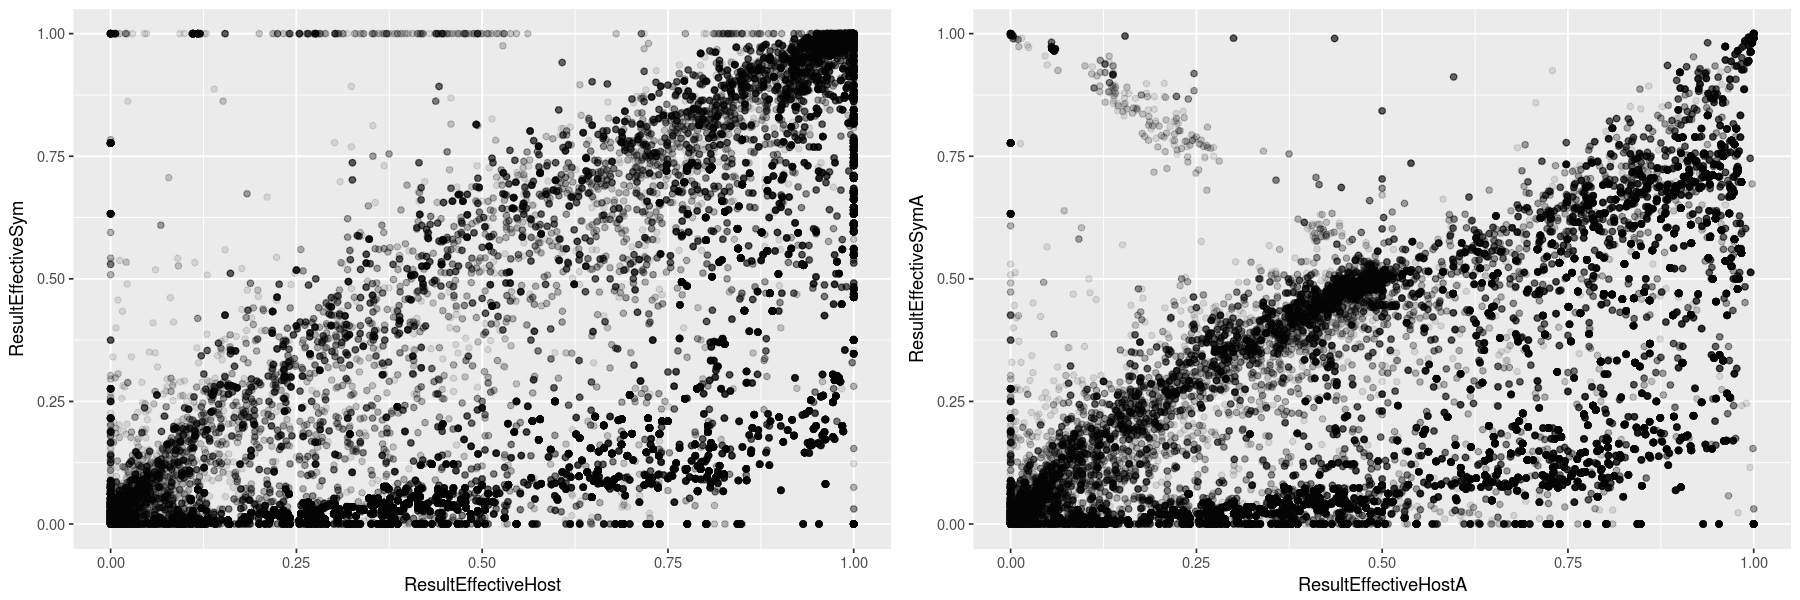

In [91]:
library(gridExtra)
library(ggplot2)
options(repr.plot.width = 15, repr.plot.height = 5)

p1 <- ggplot(resultsSet, aes(ResultEffectiveHost, ResultEffectiveSym)) + geom_point(alpha = 1/10)
p2 <- ggplot(resultsSet, aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)

grid.arrange(p1, p2,  ncol = 2, nrow = 1)

Look at the correlation across specific simulation combinations.

First row: All three rates at 0.1, 0.3, and 0.5 percent

Each subsequent row - Two rates at 0.1, 0.3, and 0.5 with the third rate fixed at 0.1.  (In order: Mutation, HGT, then Drop)

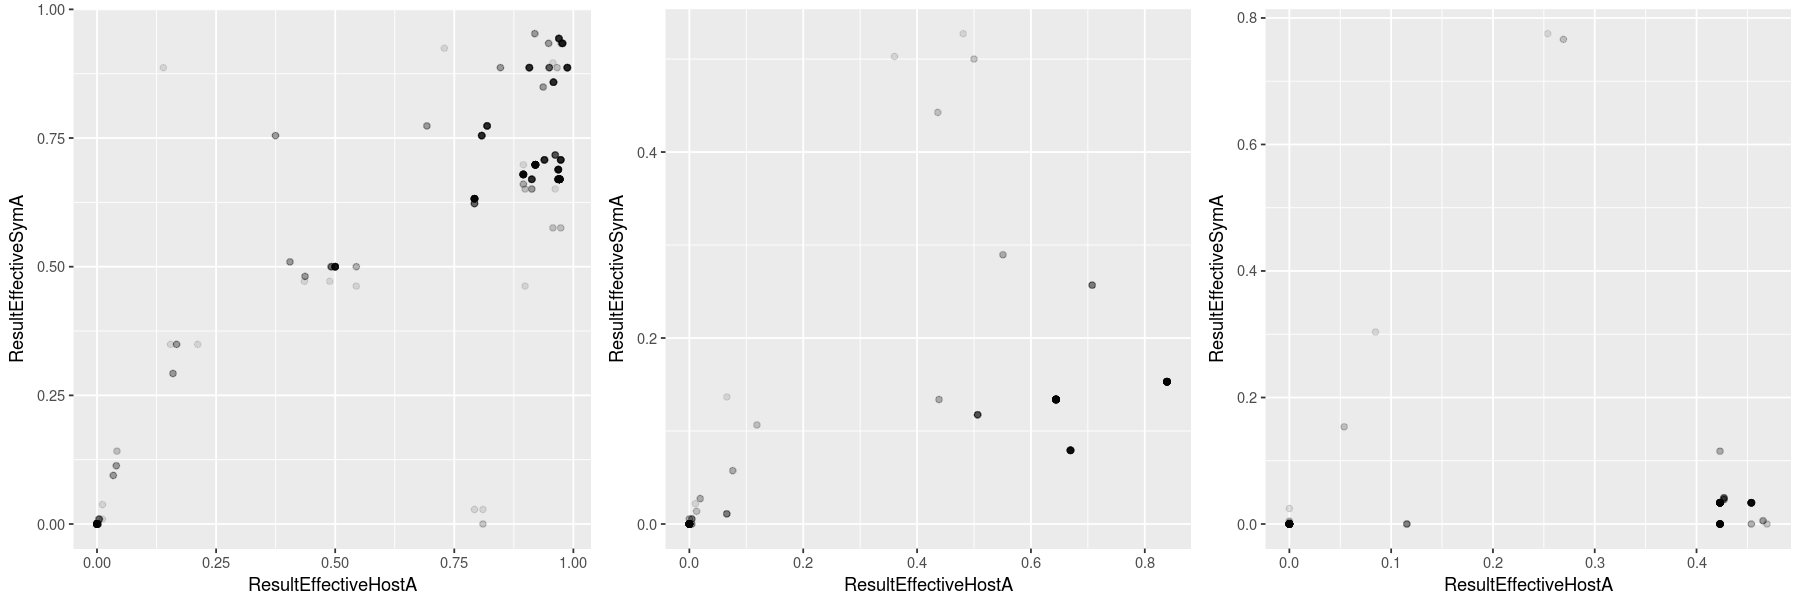

In [92]:
p1 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.1 & resultsSet$ParamSimHGT == 0.1 & resultsSet$ParamSimDrop == 0.1,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p2 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.3 & resultsSet$ParamSimHGT == 0.3 & resultsSet$ParamSimDrop == 0.3,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p3 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.5 & resultsSet$ParamSimHGT == 0.5 & resultsSet$ParamSimDrop == 0.5,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)

grid.arrange(p1, p2, p3, ncol = 3, nrow = 1)#, widths=c(1,1,1))

**Mutation rate fixed at 0.1**

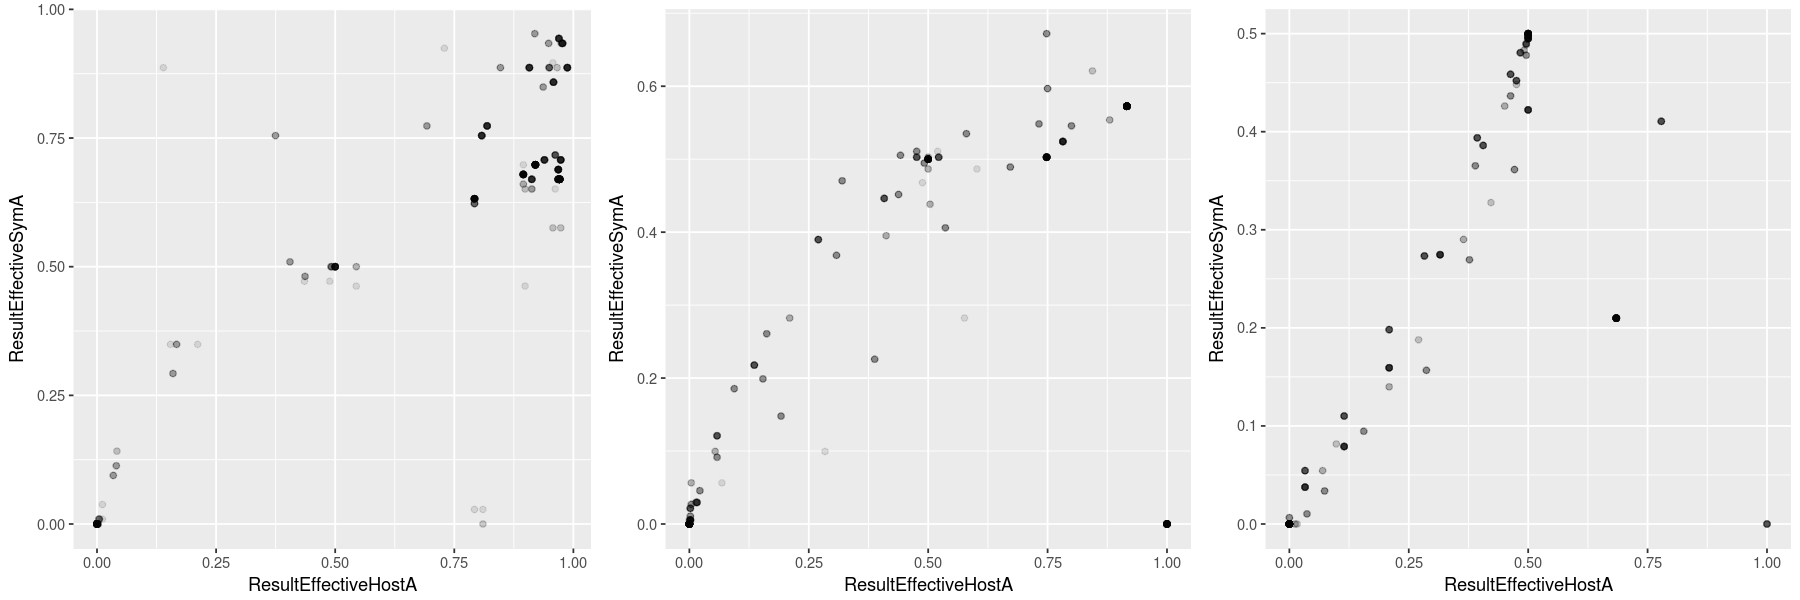

In [93]:
p1 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.1 & resultsSet$ParamSimHGT == 0.1 & resultsSet$ParamSimDrop == 0.1,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p2 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.1 & resultsSet$ParamSimHGT == 0.3 & resultsSet$ParamSimDrop == 0.3,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p3 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.1 & resultsSet$ParamSimHGT == 0.5 & resultsSet$ParamSimDrop == 0.5,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)

grid.arrange(p1, p2, p3, ncol = 3, nrow = 1)

**HGT rate fixed at 0.1**

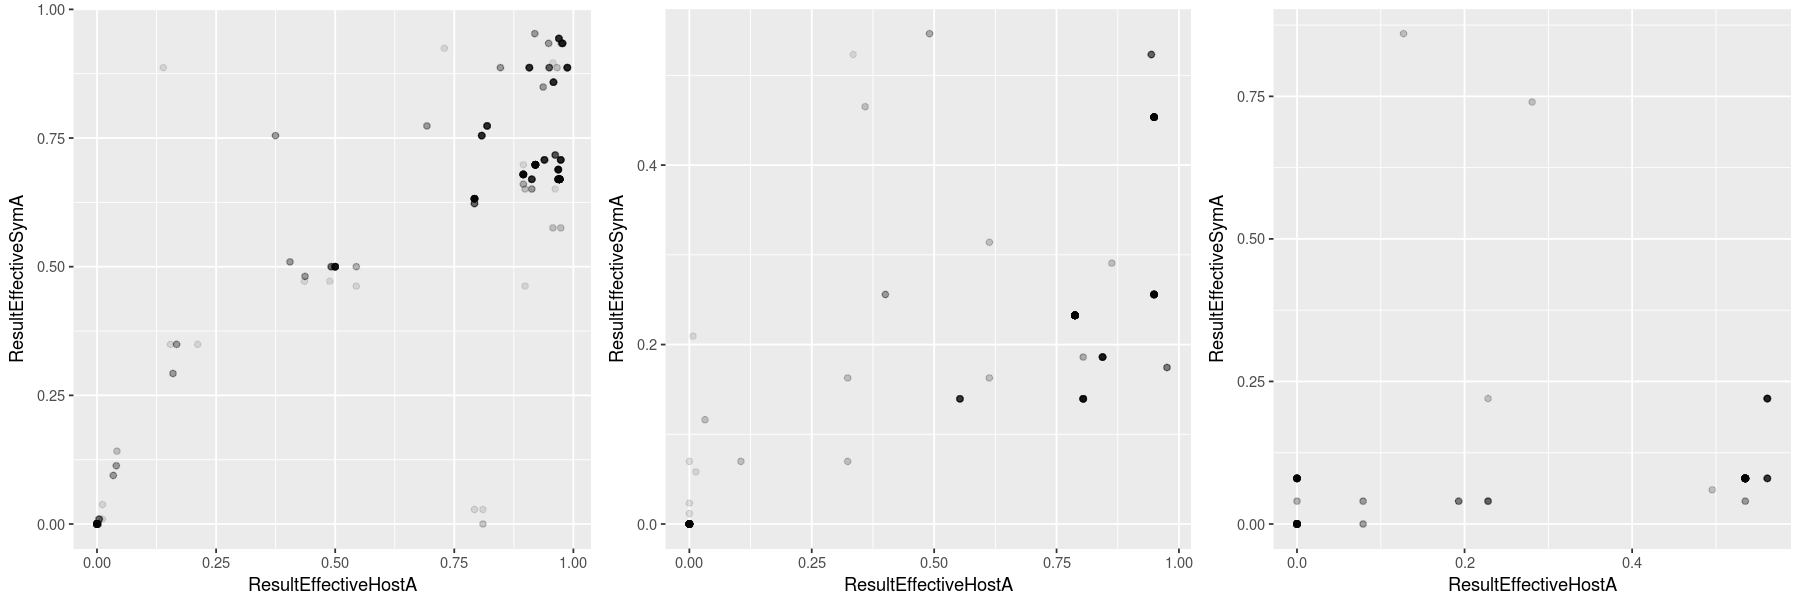

In [94]:
p1 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.1 & resultsSet$ParamSimHGT == 0.1 & resultsSet$ParamSimDrop == 0.1,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p2 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.3 & resultsSet$ParamSimHGT == 0.1 & resultsSet$ParamSimDrop == 0.3,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p3 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.5 & resultsSet$ParamSimHGT == 0.1 & resultsSet$ParamSimDrop == 0.5,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)

grid.arrange(p1, p2, p3, ncol = 3, nrow = 1)

**Drop rate fixed at 0.1**

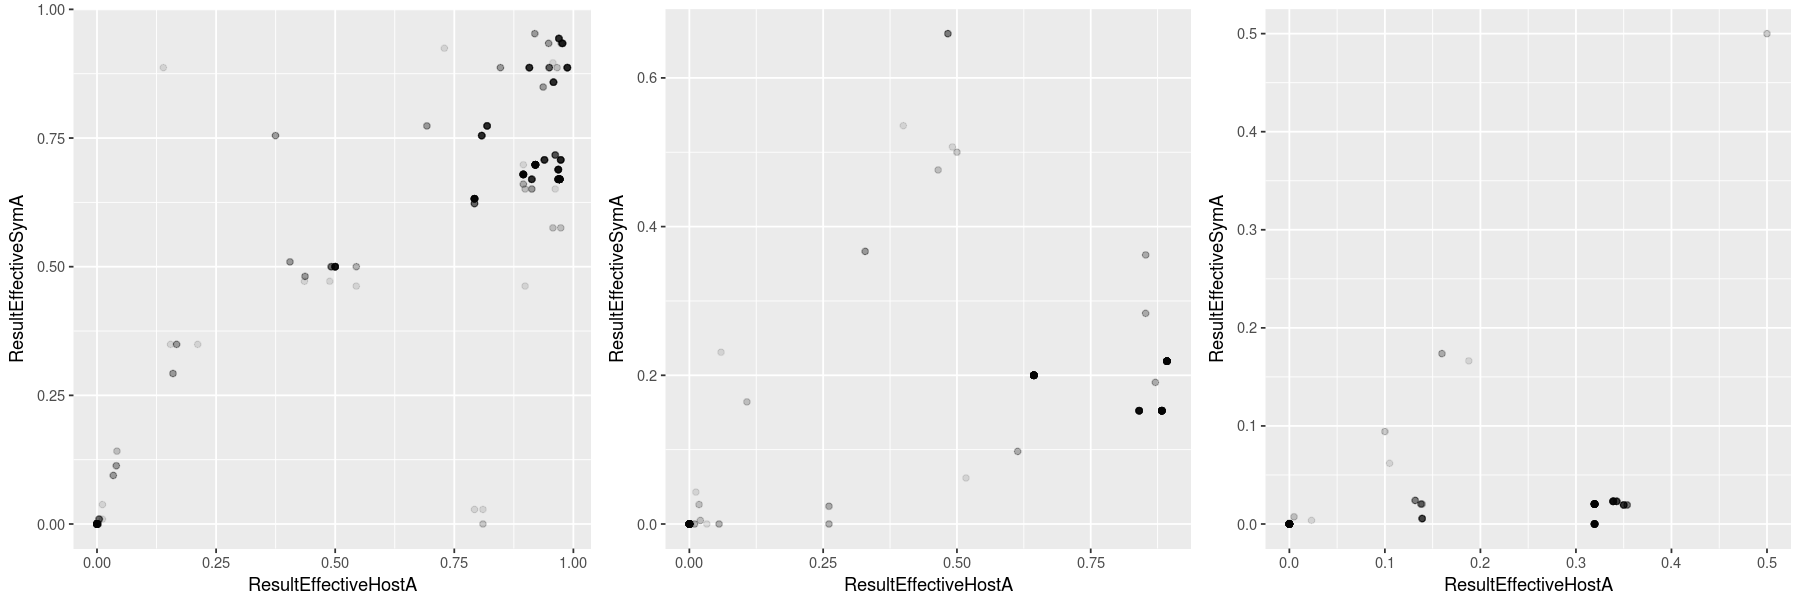

In [95]:
p1 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.1 & resultsSet$ParamSimHGT == 0.1 & resultsSet$ParamSimDrop == 0.1,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p2 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.3 & resultsSet$ParamSimHGT == 0.3 & resultsSet$ParamSimDrop == 0.1,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)
p3 <- ggplot(resultsSet[resultsSet$ParamSimMutation == 0.5 & resultsSet$ParamSimHGT == 0.5 & resultsSet$ParamSimDrop == 0.1,], aes(ResultEffectiveHostA, ResultEffectiveSymA)) + geom_point(alpha = 1/10)

grid.arrange(p1, p2, p3, ncol = 3, nrow = 1)

Now compensate for ambiguous hits as well, as view effect

Accounting for ambiguous cases seems to add a senario (given some simulation/testing parameters) that causes a negative correlation.  Investigate this

Calculate effective HGT by taking good HGT hits minux bad HGT hits out of all possible HGT events.  Then plot in relation to both the host profile and the symbiont profile

In [96]:
resultsSet$ResultEffectiveHGT <- (resultsSet$ResultHGTGood - resultsSet$ResultHGTBad) / resultsSet$ActualHGT
resultsSet$ResultEffectiveHGT <- (resultsSet$ResultEffectiveHGT + 1) / 2

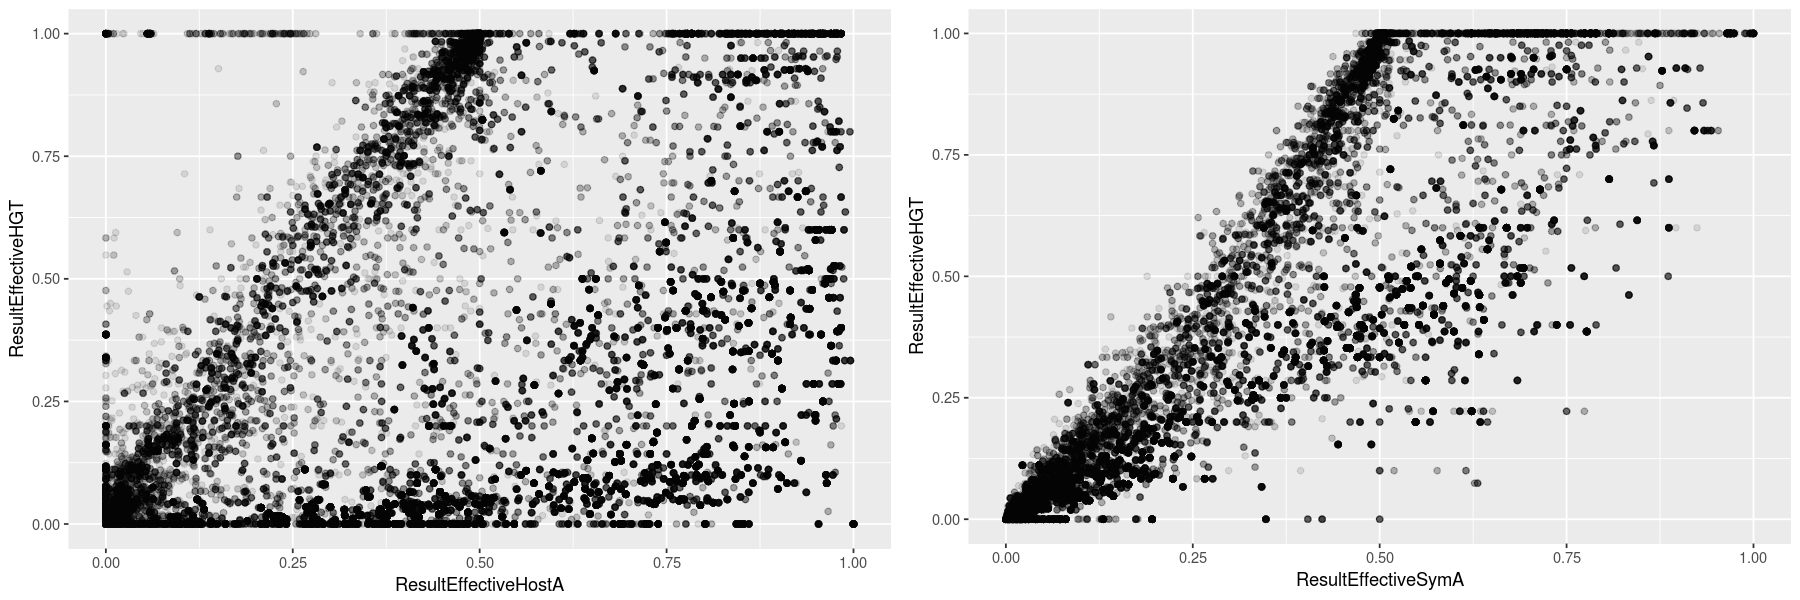

In [97]:
p1 <- ggplot(resultsSet, aes(ResultEffectiveHostA, ResultEffectiveHGT)) + geom_point(alpha = 1/10)
p2 <- ggplot(resultsSet, aes(ResultEffectiveSymA, ResultEffectiveHGT)) + geom_point(alpha = 1/10)

grid.arrange(p1, p2,  ncol = 2, nrow = 1)

Condense effectiveness into a single value by averaging these two values.  Isolate the parameters and this total effectiveness into a new dataframe. Then show a correlation matrix, and pairwise comparisons for simulation and testing parameters against total effectiveness.

In [98]:
parameterSet <- data.frame(resultsSet$ParamSimMutation, 
                           resultsSet$ParamSimHGT, 
                           resultsSet$ParamSimDrop, 
                           resultsSet$ParamTestDistance, 
                           resultsSet$ParamTestTaxa, 
                           resultsSet$ParamTestProtein,
                           resultsSet$ResultEffectiveHostA)
cor(parameterSet, use="complete")

parameterSet <- data.frame(resultsSet$ParamSimMutation, 
                           resultsSet$ParamSimHGT, 
                           resultsSet$ParamSimDrop, 
                           resultsSet$ParamTestDistance, 
                           resultsSet$ParamTestTaxa, 
                           resultsSet$ParamTestProtein,
                           resultsSet$ResultEffectiveSymA)
cor(parameterSet, use="complete")

resultsSet$ResultEffectiveCombined <- (resultsSet$ResultEffectiveHostA + resultsSet$ResultEffectiveSymA) / 2
parameterSet <- data.frame(resultsSet$ParamSimMutation, 
                           resultsSet$ParamSimHGT, 
                           resultsSet$ParamSimDrop, 
                           resultsSet$ParamTestDistance, 
                           resultsSet$ParamTestTaxa, 
                           resultsSet$ParamTestProtein,
                           resultsSet$ResultEffectiveCombined)
cor(parameterSet, use="complete")

,resultsSet.ParamSimMutation,resultsSet.ParamSimHGT,resultsSet.ParamSimDrop,resultsSet.ParamTestDistance,resultsSet.ParamTestTaxa,resultsSet.ParamTestProtein,resultsSet.ResultEffectiveHostA
resultsSet.ParamSimMutation,1.000000e+00,-1.524576e-18,-7.449990e-19,4.248567e-19,-2.632932e-21,-3.285005e-21,-0.43997114
resultsSet.ParamSimHGT,-1.524576e-18,1.000000e+00,0.000000e+00,5.176879e-19,0.000000e+00,0.000000e+00,-0.23056593
resultsSet.ParamSimDrop,-7.449990e-19,0.000000e+00,1.000000e+00,5.127762e-19,0.000000e+00,0.000000e+00,-0.02683095
resultsSet.ParamTestDistance,4.248567e-19,5.176879e-19,5.127762e-19,1.000000e+00,-1.916519e-23,-3.285005e-21,0.38786393
resultsSet.ParamTestTaxa,-2.632932e-21,0.000000e+00,0.000000e+00,-1.916519e-23,1.000000e+00,-6.570466e-21,-0.05015466
resultsSet.ParamTestProtein,-3.285005e-21,0.000000e+00,0.000000e+00,-3.285005e-21,-6.570466e-21,1.000000e+00,-0.07280770
resultsSet.ResultEffectiveHostA,-4.399711e-01,-2.305659e-01,-2.683095e-02,3.878639e-01,-5.015466e-02,-7.280770e-02,1.00000000


,resultsSet.ParamSimMutation,resultsSet.ParamSimHGT,resultsSet.ParamSimDrop,resultsSet.ParamTestDistance,resultsSet.ParamTestTaxa,resultsSet.ParamTestProtein,resultsSet.ResultEffectiveSymA
resultsSet.ParamSimMutation,1.000000e+00,-4.651744e-17,-2.861173e-18,-5.414363e-19,3.682235e-20,-5.745176e-21,-0.50656907
resultsSet.ParamSimHGT,-4.651744e-17,1.000000e+00,3.993435e-18,1.064770e-18,-6.406336e-20,5.560669e-25,-0.11342481
resultsSet.ParamSimDrop,-2.861173e-18,3.993435e-18,1.000000e+00,5.127762e-19,0.000000e+00,0.000000e+00,-0.08318546
resultsSet.ParamTestDistance,-5.414363e-19,1.064770e-18,5.127762e-19,1.000000e+00,-2.299823e-23,-3.284914e-21,0.22437817
resultsSet.ParamTestTaxa,3.682235e-20,-6.406336e-20,0.000000e+00,-2.299823e-23,1.000000e+00,-6.570375e-21,-0.09494226
resultsSet.ParamTestProtein,-5.745176e-21,5.560669e-25,0.000000e+00,-3.284914e-21,-6.570375e-21,1.000000e+00,-0.09237689
resultsSet.ResultEffectiveSymA,-5.065691e-01,-1.134248e-01,-8.318546e-02,2.243782e-01,-9.494226e-02,-9.237689e-02,1.00000000


,resultsSet.ParamSimMutation,resultsSet.ParamSimHGT,resultsSet.ParamSimDrop,resultsSet.ParamTestDistance,resultsSet.ParamTestTaxa,resultsSet.ParamTestProtein,resultsSet.ResultEffectiveCombined
resultsSet.ParamSimMutation,1.000000e+00,-4.651744e-17,-2.861173e-18,-5.414363e-19,3.682235e-20,-5.745176e-21,-0.47198411
resultsSet.ParamSimHGT,-4.651744e-17,1.000000e+00,3.993435e-18,1.064770e-18,-6.406336e-20,5.560669e-25,-0.15931000
resultsSet.ParamSimDrop,-2.861173e-18,3.993435e-18,1.000000e+00,5.127762e-19,0.000000e+00,0.000000e+00,-0.05660427
resultsSet.ParamTestDistance,-5.414363e-19,1.064770e-18,5.127762e-19,1.000000e+00,-2.299823e-23,-3.284914e-21,0.32665964
resultsSet.ParamTestTaxa,3.682235e-20,-6.406336e-20,0.000000e+00,-2.299823e-23,1.000000e+00,-6.570375e-21,-0.08957690
resultsSet.ParamTestProtein,-5.745176e-21,5.560669e-25,0.000000e+00,-3.284914e-21,-6.570375e-21,1.000000e+00,-0.08543826
resultsSet.ResultEffectiveCombined,-4.719841e-01,-1.593100e-01,-5.660427e-02,3.266596e-01,-8.957690e-02,-8.543826e-02,1.00000000


Testing to see distributions of total effectiveness by parameter type

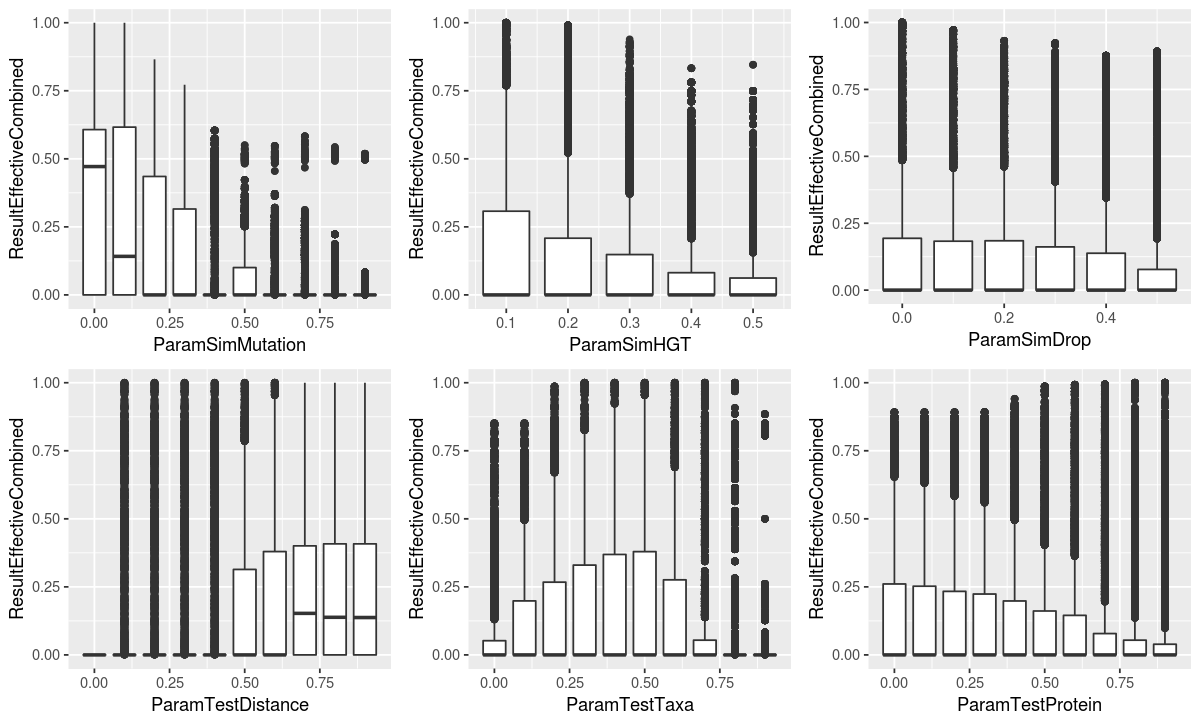

In [101]:
p1 <- ggplot(resultsSet, aes(ParamSimMutation, ResultEffectiveCombined, group=cut_width(ParamSimMutation, 0.10))) + geom_boxplot()
p2 <- ggplot(resultsSet, aes(ParamSimHGT, ResultEffectiveCombined, group=cut_width(ParamSimHGT, 0.10))) + geom_boxplot()
p3 <- ggplot(resultsSet, aes(ParamSimDrop, ResultEffectiveCombined, group=cut_width(ParamSimDrop, 0.10))) + geom_boxplot()
p4 <- ggplot(resultsSet, aes(ParamTestDistance, ResultEffectiveCombined, group=cut_width(ParamTestDistance, 0.10))) + geom_boxplot()
p5 <- ggplot(resultsSet, aes(ParamTestTaxa, ResultEffectiveCombined, group=cut_width(ParamTestTaxa, 0.10))) + geom_boxplot()
p6 <- ggplot(resultsSet, aes(ParamTestProtein, ResultEffectiveCombined, group=cut_width(ParamTestProtein, 0.10))) + geom_boxplot()

options(repr.plot.width = 10, repr.plot.height = 6)
grid.arrange(p1, p2, p3, p4, p5, p6, nrow=2, ncol=3)

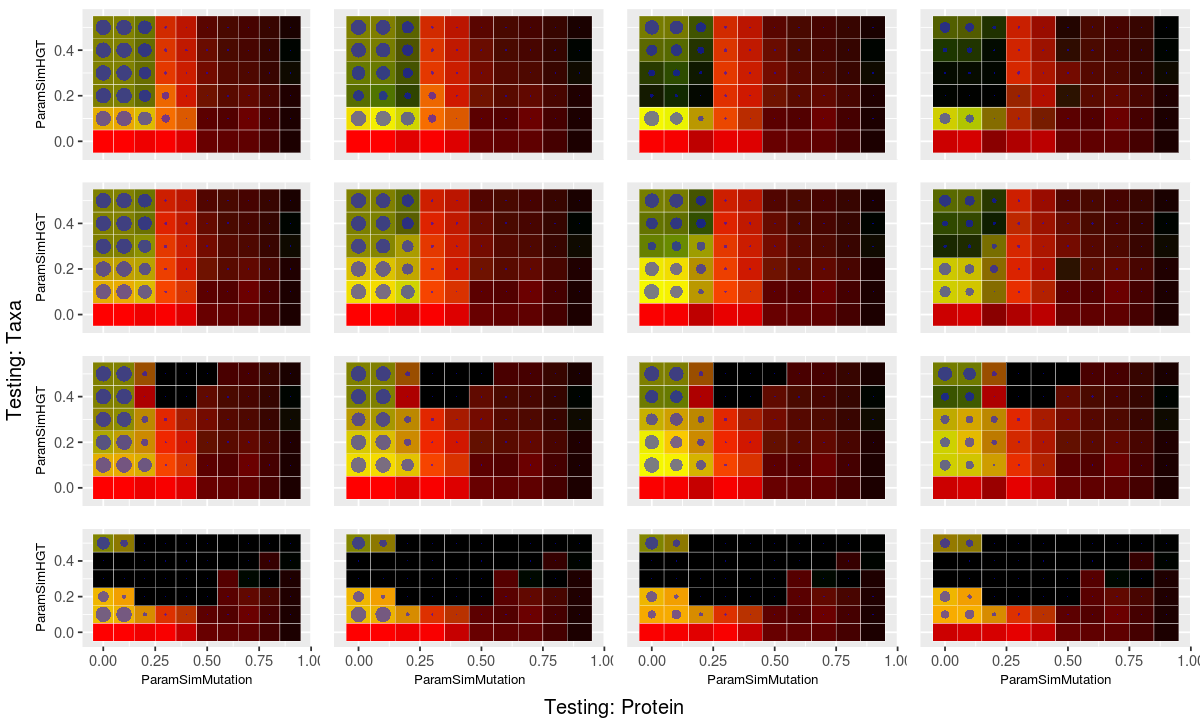

In [100]:
#chartList = sapply(c(0.2, 0.4, 0.6, 0.8), function(activeDistance) {
#    rowList = lapply(c(0.2, 0.4, 0.6, 0.8), function (activeTaxaRep) {
#        resultsSubset <- resultsSet[resultsSet$ParamTestDistance == activeDistance & resultsSet$ParamTestTaxa == activeTaxaRep & resultsSet$ParamTestProtein == 0.60 & resultsSet$ParamSimDrop == 0.1,]
#        effectiveColors <- rgb(resultsSubset$ResultEffectiveHostA, ifelse(is.nan(resultsSubset$ResultEffectiveSymA),0,resultsSubset$ResultEffectiveSymA), 0)
#        activePlot <- ggplot(resultsSubset, aes(x=ParamSimMutation, y=ParamSimHGT)) + 
#            geom_tile(color="white", fill=effectiveColors) +
#            geom_point(size=resultsSubset$ResultEffectiveHGT * 4, shape=16, color="blue", alpha=0.5) +
#            theme(axis.title=element_text(size=8))

#        if (activeTaxaRep != 0.2) activePlot <- activePlot + theme(axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank(),)
#        if (activeDistance != 0.8) activePlot <- activePlot + theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(),)
#        activePlot
            
#    })
#})

#options(repr.plot.width = 10, repr.plot.height = 6)
#do.call("grid.arrange", c(chartList, nrow=4, ncol=4, left = "Testing: Taxa", bottom = "Testing: Protein"))        
        
chartList = sapply(c(0.2, 0.4, 0.6, 0.8), function(activeTaxa) {
    rowList = lapply(c(0.2, 0.4, 0.6, 0.8), function (activeProtein) {
        resultsSubset <- resultsSet[resultsSet$ParamTestTaxa == activeTaxa & resultsSet$ParamTestProtein == activeProtein & resultsSet$ParamSimDrop == 0.1 & resultsSet$ParamTestDistance == 0.7,]
        effectiveColors <- rgb(resultsSubset$ResultEffectiveHostA, ifelse(is.nan(resultsSubset$ResultEffectiveSymA),0,resultsSubset$ResultEffectiveSymA), 0)
        activePlot <- ggplot(resultsSubset, aes(x=ParamSimMutation, y=ParamSimHGT)) + 
            geom_tile(color="white", fill=effectiveColors) +
            geom_point(size=resultsSubset$ResultEffectiveHGT * 4, shape=16, color="blue", alpha=0.5) +
            theme(axis.title=element_text(size=8))

        if (activeProtein != 0.2) activePlot <- activePlot + theme(axis.title.y=element_blank(), axis.text.y=element_blank(), axis.ticks.y=element_blank(),)
        if (activeTaxa != 0.8) activePlot <- activePlot + theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(),)
        activePlot
            
    })
})     
      
options(repr.plot.width = 10, repr.plot.height = 6)
do.call("grid.arrange", c(chartList, nrow=4, ncol=4, left = "Testing: Taxa", bottom = "Testing: Protein"))